In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from cereeberus import ReebGraph, MapperGraph, Interleave, Assignment
import cereeberus.data.ex_mappergraphs as ex_mg

import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd

import time
import random
from tqdm import tqdm
import itertools


## Optimize for different loop size without the distance matrix


In [26]:
import time
import numpy as np

total_time = []
optimization_time = []

# Warm-up run (avoid lazy init effects)
torus_warm = ex_mg.torus(a=0, b=2, c=4, d=6, delta=1, seed=42)
line_warm = ex_mg.line(a=0, b=6, seed=0)
warm = Interleave(torus_warm, line_warm)
warm.fit()

for i in range(1,51):
    print(f"Benchmarking i={i}")
    torus = ex_mg.torus(a=0, b=2, c=i+2, d=i+4, delta=1, seed=42)
    line = ex_mg.line(a=0, b=i+4, seed=0)
     
    temp_total_time = []
    temp_optimization_time = []

    for j in range(10):
        start = time.perf_counter()
        myInt = Interleave(torus, line)
        opt_start = time.perf_counter()
        myInt.fit()
        end = time.perf_counter()

        temp_total_time.append(end - start)
        temp_optimization_time.append(end - opt_start)

    total_time.append((np.mean(temp_total_time), np.std(temp_total_time)))
    optimization_time.append((np.mean(temp_optimization_time), np.std(temp_optimization_time)))

# export results as a csv
df = pd.DataFrame({"loop_size": list(range(1,51)),
    "total_time_mean": [x[0] for x in total_time],
    "total_time_std": [x[1] for x in total_time],
    "optimization_time_mean": [x[0] for x in optimization_time],
    "optimization_time_std": [x[1] for x in optimization_time],
    })
df.to_csv("torus_line_benchmark.csv", index=False)

Benchmarking i=1
Benchmarking i=2
Benchmarking i=3
Benchmarking i=4
Benchmarking i=5
Benchmarking i=6
Benchmarking i=7
Benchmarking i=8
Benchmarking i=9
Benchmarking i=10
Benchmarking i=11
Benchmarking i=12
Benchmarking i=13
Benchmarking i=14
Benchmarking i=15
Benchmarking i=16
Benchmarking i=17
Benchmarking i=18
Benchmarking i=19
Benchmarking i=20
Benchmarking i=21
Benchmarking i=22
Benchmarking i=23
Benchmarking i=24
Benchmarking i=25
Benchmarking i=26
Benchmarking i=27
Benchmarking i=28
Benchmarking i=29
Benchmarking i=30
Benchmarking i=31
Benchmarking i=32
Benchmarking i=33
Benchmarking i=34
Benchmarking i=35
Benchmarking i=36
Benchmarking i=37
Benchmarking i=38
Benchmarking i=39
Benchmarking i=40
Benchmarking i=41
Benchmarking i=42
Benchmarking i=43
Benchmarking i=44
Benchmarking i=45
Benchmarking i=46
Benchmarking i=47
Benchmarking i=48
Benchmarking i=49
Benchmarking i=50


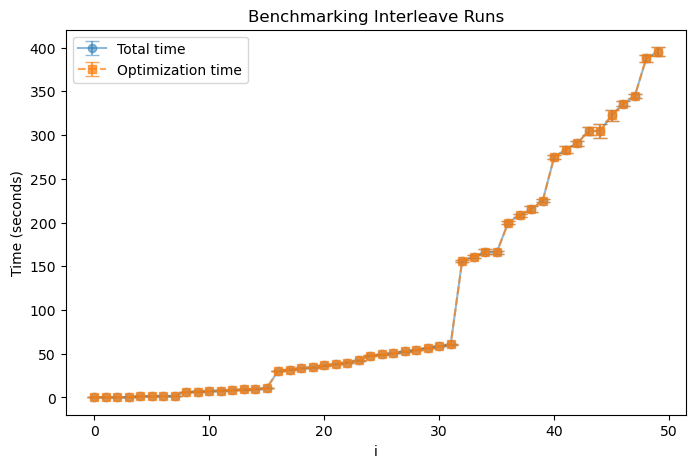

In [28]:
import time
import numpy as np

total_time = []
optimization_time = []

# Warm-up run (avoid lazy init effects)
torus_warm = ex_mg.torus(a=0, b=2, c=4, d=6, delta=1, seed=42)
line_warm = ex_mg.line(a=0, b=6, seed=0)
warm = Interleave(torus_warm, line_warm)
warm.dist_fit()

for i in range(1,51):
    print(f"Benchmarking i={i}")
    torus = ex_mg.torus(a=0, b=2, c=i+2, d=i+4, delta=1, seed=42)
    line = ex_mg.line(a=0, b=i+4, seed=0)
     
    temp_total_time = []
    temp_optimization_time = []

    for j in range(10):
        start = time.perf_counter()
        myInt = Interleave(torus, line)
        opt_start = time.perf_counter()
        myInt.dist_fit()
        end = time.perf_counter()

        temp_total_time.append(end - start)
        temp_optimization_time.append(end - opt_start)

    total_time.append((np.mean(temp_total_time), np.std(temp_total_time)))
    optimization_time.append((np.mean(temp_optimization_time), np.std(temp_optimization_time)))

# export results as a csv
df = pd.DataFrame({"loop_size": list(range(1,51)),
    "total_time_mean": [x[0] for x in total_time],
    "total_time_std": [x[1] for x in total_time],
    "optimization_time_mean": [x[0] for x in optimization_time],
    "optimization_time_std": [x[1] for x in optimization_time],
    })
df.to_csv("torus_line_dist_benchmark.csv", index=False)

Benchmarking i=1
Benchmarking i=2
Benchmarking i=3
Benchmarking i=4
Benchmarking i=5
Benchmarking i=6
Benchmarking i=7
Benchmarking i=8
Benchmarking i=9
Benchmarking i=10
Benchmarking i=11
Benchmarking i=12
Benchmarking i=13
Benchmarking i=14
Benchmarking i=15
Benchmarking i=16
Benchmarking i=17
Benchmarking i=18
Benchmarking i=19
Benchmarking i=20
Benchmarking i=21
Benchmarking i=22
Benchmarking i=23
Benchmarking i=24
Benchmarking i=25
Benchmarking i=26
Benchmarking i=27
Benchmarking i=28
Benchmarking i=29
Benchmarking i=30
Benchmarking i=31
Benchmarking i=32
Benchmarking i=33
Benchmarking i=34
Benchmarking i=35
Benchmarking i=36
Benchmarking i=37
Benchmarking i=38
Benchmarking i=39
Benchmarking i=40
Benchmarking i=41
Benchmarking i=42
Benchmarking i=43
Benchmarking i=44
Benchmarking i=45
Benchmarking i=46
Benchmarking i=47
Benchmarking i=48
Benchmarking i=49
Benchmarking i=50


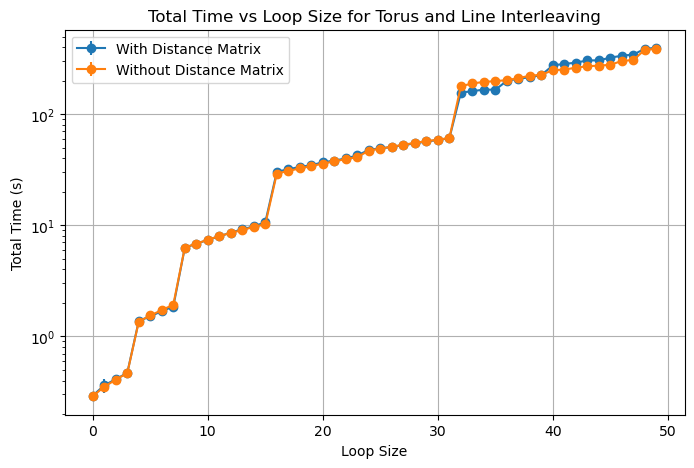

In [30]:
# read from csv
df1 = pd.read_csv("torus_line_benchmark.csv")
df2 = pd.read_csv("torus_line_dist_benchmark.csv")

import matplotlib.pyplot as plt
import numpy as np
x = np.arange(len(total_time))
#unpack dist means and stds
dist_means, dist_stds = zip(*df2[["total_time_mean", "total_time_std"]].values)
means, stds = zip(*df1[["total_time_mean", "total_time_std"]].values)
plt.figure(figsize=(8,5))

plt.errorbar(x, means, yerr=stds, label='With Distance Matrix', fmt='-o')
plt.errorbar(x, dist_means, yerr=dist_stds, label='Without Distance Matrix', fmt='-o')
plt.xlabel('Loop Size')
plt.ylabel('Total Time (s)')
plt.title('Total Time vs Loop Size for Torus and Line Interleaving')
plt.legend()
plt.grid()
plt.yscale('log')
plt.savefig("torus_line_benchmark.png") 